# Toric geometry in `Oscar.jl`

This notebook gives an overview of functionality in `Oscar.jl` that is relevant to toric geometry. It is divided into two parts, one on polyhedral geometry and one on toric geometry.

We will mainly deal with *normal* toric varieties, since these correspond to combinatorially "easy" objects.

In [29]:
using Oscar

Not everything I write here is in the current Oscar release yet, e.g. the visualization is not. Hence it makes sense to work with the `Oscar.jl` developer version. This can be done via the following steps:
- `git clone https://github.com/oscar-system/Oscar.jl/` or
- `git clone git@github.com:oscar-system/Oscar.jl` if you have a github account.
- `cd Oscar.jl`, i.e. go into the Oscar directory
- Start Julia `julia`
- `]dev .`

Please let me know if there are any errors.

## Polyhedral geometry

The main objects one needs on the polyhedral side are cones, fans, and polyhedra. We will give a short overview on how to construct these and ask for various properties.

### Cones

We will make the cone associated to the two-dimensional cyclic quotient singularity $Y_{2,5}$. You can just take the following as a definition.

In [30]:
Y_2_5 = positive_hull([-2 5; 1 0])
rays(Y_2_5)

2-element VectorIterator{RayVector{Polymake.Rational}}:
 [-1, 5/2]
 [1, 0]

In [31]:
facets(Y_2_5)

2-element HalfspaceIterator{Halfspace}:
 The Halfspace of R^2 described by
1: -5*x₁ - 2*x₂ ≦ 0

 The Halfspace of R^2 described by
1: -x₂ ≦ 0


To dualize the cone, one needs to access `polymake` functionality directly. This will be wrapped in the future, however it is useful to demonstrate how this can be done for any other functionality that you might encounter which is not attached yet.

In [32]:
Y_2_5_dual = Cone(Polymake.polytope.polarize(Y_2_5.pm_cone))

A polyhedral cone in ambient dimension 2

In [33]:
rays(Y_2_5_dual)

2-element VectorIterator{RayVector{Polymake.Rational}}:
 [1, 2/5]
 [0, 1]

The Hilbert basis of the dual cone gives rise to the toric ideal defining `Y_{2,5}`.

In [34]:
hilbert_basis(Y_2_5_dual)

4-element VectorIterator{PointVector{Polymake.Integer}}:
 [5, 2]
 [0, 1]
 [2, 1]
 [1, 1]

Again to get at the toric ideal one currently has to go via `polymake`'s property system. This will also be wrapped in the future.

In [35]:
Y_2_5_dual.pm_cone.CONE_TORIC_IDEAL.BINOMIAL_GENERATORS

pm::Matrix<long>
-1 -1 2 1
-1 0 3 -1
0 -1 -1 2


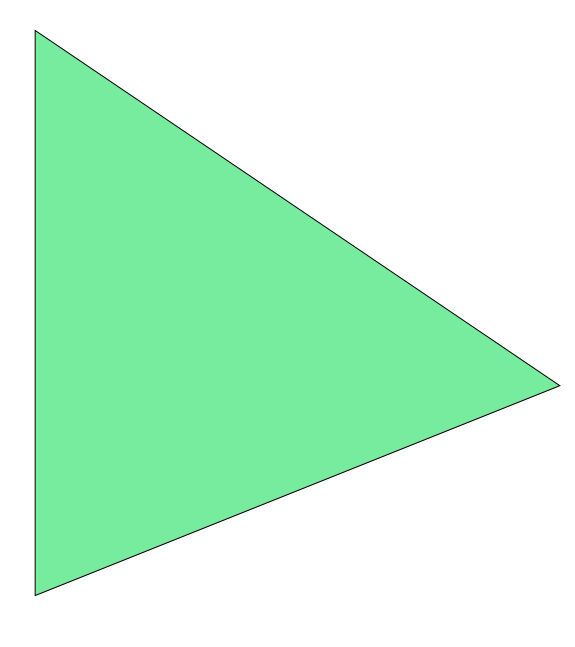

In [36]:
visualize(Y_2_5_dual)

In [37]:
C0 = positive_hull([1 0; 1 1])
C1 = positive_hull([1 1; 0 1])
C01 = intersect(C0, C1)
rays(C01)

1-element VectorIterator{RayVector{Polymake.Rational}}:
 [1, 1]

### Polyhedra

We start by constructing a polyhedron as the convex hull of some points and then ask for some properties of it.

In [38]:
hexagon = convex_hull([0 0; 1 0; 2 1; 2 2; 1 2; 0 1])
vertices(hexagon)

6-element VectorIterator{PointVector{Polymake.Rational}}:
 [0, 0]
 [1, 0]
 [2, 1]
 [2, 2]
 [1, 2]
 [0, 1]

In [39]:
isnormal(hexagon)

true

In [40]:
lattice_points(hexagon)

7-element VectorIterator{PointVector{Polymake.Integer}}:
 [0, 0]
 [2, 1]
 [1, 2]
 [1, 0]
 [1, 1]
 [0, 1]
 [2, 2]

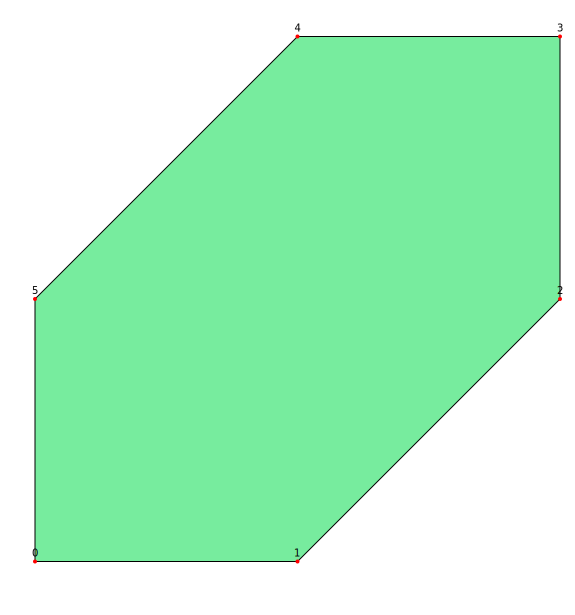

In [41]:
visualize(hexagon)

### Polyhedral fans

We continue with the hexagon and construct its normal fan.

In [42]:
nfh = normal_fan(hexagon)

A polyhedral fan in ambient dimension 2

In [43]:
rays(nfh)

6-element VectorIterator{RayVector{Polymake.Rational}}:
 [1, 0]
 [0, 1]
 [1, -1]
 [-1, 1]
 [-1, 0]
 [0, -1]

In [44]:
maximal_cones(nfh)

Oscar.MaximalConeIterator(A polyhedral fan in ambient dimension 2)

In [45]:
for mc in maximal_cones(nfh)
    println(rays(mc))
end

RayVector{Polymake.Rational}[[1, 0], [0, 1]]
RayVector{Polymake.Rational}[[0, 1], [-1, 1]]
RayVector{Polymake.Rational}[[-1, 1], [-1, 0]]
RayVector{Polymake.Rational}[[-1, 0], [0, -1]]
RayVector{Polymake.Rational}[[1, -1], [0, -1]]
RayVector{Polymake.Rational}[[1, 0], [1, -1]]


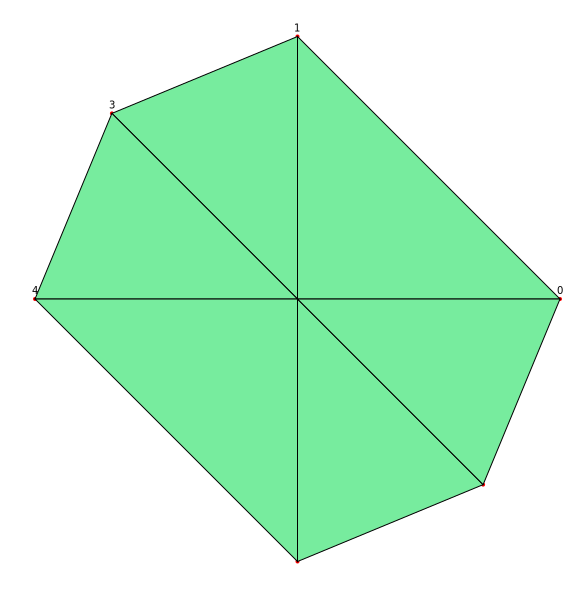

In [46]:
visualize(nfh)

# Toric geometry

Toric varieties have been migrated to Oscar. They are not in the release yet, though.

Here we create the toric variety from the normal fan of the square.

In [47]:
square = cube(2)
nf = normal_fan(square)
ntv = NormalToricVariety(nf)

A normal toric variety corresponding to a polyhedral fan in ambient dimension 2

Now we can check for various properties, like smoothness, projectiveness, etc.

In [48]:
issmooth(ntv)

true

In [49]:
isprojective(ntv)

true

In [50]:
D = ToricDivisor(ntv, [1,0,0,0])

A torus invariant divisor on a normal toric variety

In [51]:
isample(D)

false

In [52]:
isvery_ample(D)

false

In [53]:
P = polyhedron(D)
vertices(P)

2-element VectorIterator{PointVector{Polymake.Rational}}:
 [0, 0]
 [-1, 0]

## Toric ideals

We want to compute the toric ideal from the rows of the following matrix:

In [54]:
A = [2 2 1 0 0 1 1; 1 0 0 1 2 2 1; 0 1 2 2 1 0 1]

3×7 Matrix{Int64}:
 2  2  1  0  0  1  1
 1  0  0  1  2  2  1
 0  1  2  2  1  0  1

Oscar works row-wise, so in this case you have to transpose the matrix.

In [55]:
TI = toric_ideal(transpose(A))

ideal(x_{4}*x_{6} - x_{5}*x_{7}, x_{3}*x_{6} - x_{7}^2, -x_{1}*x_{7} + x_{2}*x_{6}, x_{3}*x_{5} - x_{4}*x_{7}, x_{2}*x_{5} - x_{7}^2, x_{1}*x_{5} - x_{6}*x_{7}, x_{2}*x_{4} - x_{3}*x_{7}, x_{1}*x_{4} - x_{7}^2, x_{1}*x_{3} - x_{2}*x_{7})

In [56]:
dim(TI)

3

Compute the degree via polyhedral methods.

In [57]:
P = convex_hull(A')

A polyhedron in ambient dimension 3

In [58]:
p = project_full(P)

A polyhedron in ambient dimension 2

In [59]:
lattice_volume(p)

6